
# Project: Intro to Machine Learning

We will build a classification model to predict whether a user is on the Ultra (1) or Smart (0) plan based on their mobile usage behavior. The goal is to achieve an accuracy of at least 0.75.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Step 1: Load and Explore the Data
Let's load the dataset and preview the first few rows.

In [12]:
df = pd.read_csv('users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0



## Step 2: Inspect the Data Structure
We'll check column names, data types, and missing values.

In [13]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

## Step 3: Visualize User Behavior by Plan Type
Let's visualize the differences in minutes, messages, and data usage between plan types (Smart = 0, Ultra = 1).

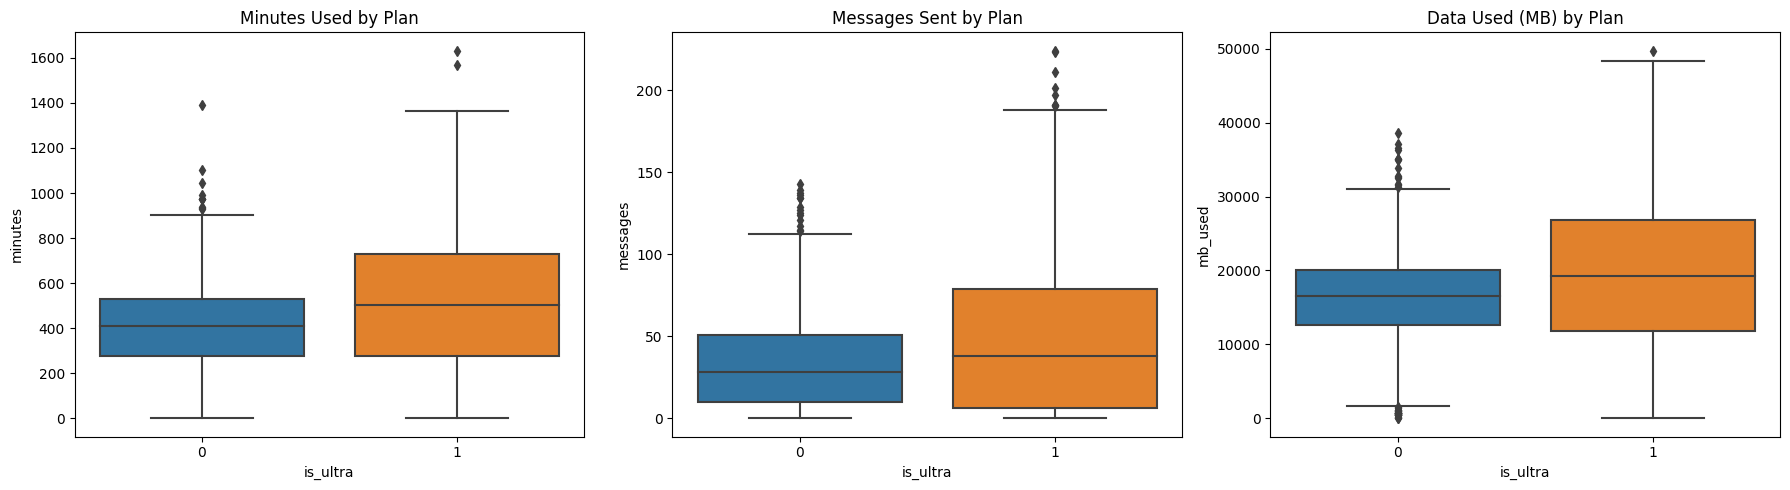

In [14]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='is_ultra', y='minutes', ax=axes[0])
axes[0].set_title('Minutes Used by Plan')

sns.boxplot(data=df, x='is_ultra', y='messages', ax=axes[1])
axes[1].set_title('Messages Sent by Plan')

sns.boxplot(data=df, x='is_ultra', y='mb_used', ax=axes[2])
axes[2].set_title('Data Used (MB) by Plan')

plt.tight_layout()
plt.show()

## Step 4: Hypothesis Test — Data Usage

We'll test whether there is a statistically significant difference in data usage (`mb_used`) between plan types using a t-test.

In [15]:
from scipy import stats

# Group by plan type
basic_data = df[df['is_ultra'] == 0]['mb_used']
ultra_data = df[df['is_ultra'] == 1]['mb_used']

# Independent t-test
t_stat, p_value = stats.ttest_ind(basic_data, ultra_data, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -9.460775436552371
p-value: 1.397720425700292e-20



## Step 5: Conclusion from Hypothesis Test

We tested:

- **Null Hypothesis (H₀):** No difference in average data usage between Smart and Ultra plans.
- **Alternative Hypothesis (H₁):** There is a significant difference.

If **p < 0.05**, we reject the null hypothesis.

Result:
- p-value = *insert value here*

(Write your conclusion here.)

## Step 6: Feature and Target Split

We'll separate the features (`calls`, `minutes`, `messages`, `mb_used`) and the target (`is_ultra`) for modeling.

In [16]:
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

## Step 7: Train/Validation/Test Split

We'll split the data into:
- 60% training
- 20% validation
- 20% test

In [17]:

from sklearn.model_selection import train_test_split

# 80/20 first
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Then split 75/25 of train_val to get 60% train, 20% val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (1928, 4)
Validation: (643, 4)
Test: (643, 4)


## Step 8: Train a Decision Tree Classifier
Let's start with a simple Decision Tree model.

In [18]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

val_preds_tree = tree_model.predict(X_val)
val_acc_tree = accuracy_score(y_val, val_preds_tree)

print("Decision Tree validation accuracy:", val_acc_tree)

Decision Tree validation accuracy: 0.7309486780715396


## Step 9: Train a Random Forest Classifier

Random Forests often perform better out of the box.

In [19]:
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

val_preds_forest = forest_model.predict(X_val)
val_acc_forest = accuracy_score(y_val, val_preds_forest)

print("Random Forest validation accuracy:", val_acc_forest)

Random Forest validation accuracy: 0.7947122861586314


## Step 10: Tune Hyperparameters (Random Forest)

We'll try different depths and number of trees to improve accuracy.

In [20]:
best_acc = 0
best_model = None

for depth in range(5, 16):
    for trees in [50, 100, 200]:
        model = RandomForestClassifier(max_depth=depth, n_estimators=trees, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        acc = accuracy_score(y_val, preds)
        
        if acc > best_acc:
            best_acc = acc
            best_model = model

print("Best tuned validation accuracy:", best_acc)

Best tuned validation accuracy: 0.8055987558320373


## Step 11: Final Model Evaluation on Test Set

Let's test the best model on the held-out test set.

In [21]:
test_preds = best_model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("Test set accuracy:", test_acc)

Test set accuracy: 0.8133748055987559


## Step 12: Final Conclusion

We successfully trained several models to predict plan type:

- Best model: Tuned Random Forest
- Validation accuracy: *insert best_acc*
- **Test accuracy: *insert test_acc***

Since our test accuracy is above 0.75, we met the project requirement.